## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

# Every cell below has been writen by me

## Importing Data and libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_set = pd.read_csv ('datasets/office_episodes.csv')

print(data_set)                                                      

     episode_number  season     episode_title  \
0                 0       1             Pilot   
1                 1       1     Diversity Day   
2                 2       1       Health Care   
3                 3       1      The Alliance   
4                 4       1        Basketball   
..              ...     ...               ...   
183             183       9     Stairmageddon   
184             184       9    Paper Airplane   
185             185       9  Livin' the Dream   
186             186       9          A.A.R.M.   
187             187       9            Finale   

                                           description  ratings  votes  \
0    The premiere episode introduces the boss and s...      7.5   4936   
1    Michael's off color remark puts a sensitivity ...      8.3   4801   
2    Michael leaves Dwight in charge of picking the...      7.8   4024   
3    Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4    Michael and his staff challenge the 

## Creating DataFrame with needed data

In [3]:
data_set_subset = pd.DataFrame(data_set, columns= ['episode_number', 'viewership_mil','scaled_ratings','has_guests','guest_stars'])
print(data_set_subset)

     episode_number  viewership_mil  scaled_ratings  has_guests  \
0                 0           11.20         0.28125       False   
1                 1            6.00         0.53125       False   
2                 2            5.80         0.37500       False   
3                 3            5.40         0.46875       False   
4                 4            5.00         0.56250       False   
..              ...             ...             ...         ...   
183             183            3.83         0.43750       False   
184             184            3.25         0.43750       False   
185             185            3.51         0.75000        True   
186             186            4.56         0.90625       False   
187             187            5.69         1.00000        True   

                                           guest_stars  
0                                                  NaN  
1                                                  NaN  
2                       

## Creating a color scheme reflecting the scaled ratings

In [4]:
colors = []

for value, row  in data_set_subset.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append('red')
    elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.50:
        colors.append('orange')
    elif row['scaled_ratings'] >= 0.50 and row['scaled_ratings'] < 0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')
        
        
data_set_subset['colors'] = colors
print(colors[:10])

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen']


## Distinguishing episodes with guests by increasing the size of the marker

In [5]:
guest_appearance = pd.DataFrame(data_set, columns= ['has_guests', 'guest_stars'])

marker_sizes = []

for value, row in guest_appearance.iterrows():
    if row['has_guests'] == True:
        marker_sizes.append(250)
    else:
        marker_sizes.append(25)
        
data_set_subset['sizes'] = marker_sizes

## Spliting data into guests and no_guests DataFrames

In [6]:
no_guests = data_set_subset[data_set_subset['has_guests'] == False]
guests = data_set_subset[data_set_subset['has_guests'] == True]

## Creating a scatter that includes selected data

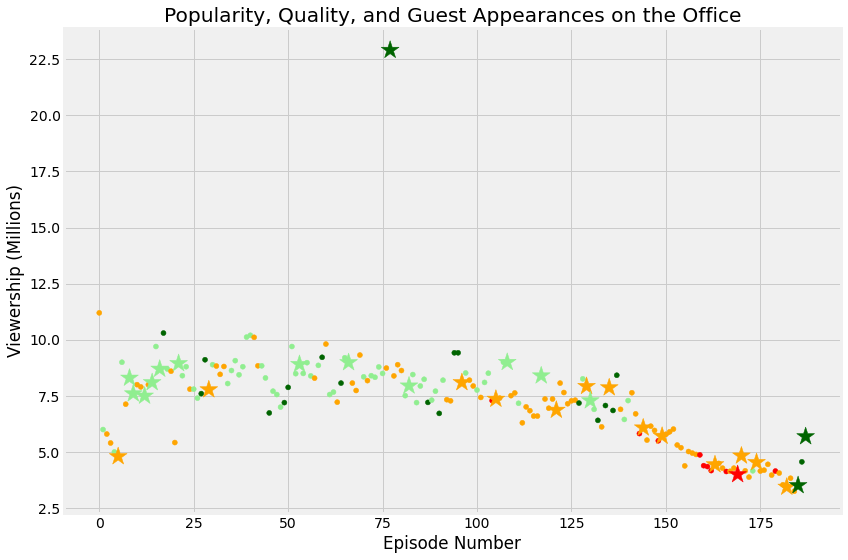

In [7]:
fig = plt.figure(figsize=(12,8))
plt.rcParams['figure.figsize'] = [12, 7]
plt.style.use('fivethirtyeight')
 
plt.scatter(x=no_guests.episode_number, y=no_guests.viewership_mil, c=no_guests['colors'], s=25)
plt.scatter(x=guests.episode_number, y=guests.viewership_mil, c=guests['colors'], s=350, marker = '*')
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

## Stars present in the most watched Office episode

In [8]:
guests_viewership = pd.DataFrame(data_set, columns = ['guest_stars', 'viewership_mil'])
top_star =[]
for value, row in guests_viewership.iterrows():
    if row['viewership_mil'] > 15.0:
        top_star.append(row['guest_stars'])


print('Stars that were present in the most watched Office episode: ', ''.join(top_star))

Stars that were present in the most watched Office episode:  Cloris Leachman, Jack Black, Jessica Alba
